In [ ]:
from matplotlib import pyplot as plt
from meta.rsi_custom_env import RsiCustomEnv
from utils.charts.plot_data_with_rsi import plot_data_with_rsi
from utils.fetch_data_with_indicators import Api, fetch_data_with_indicators
from stable_baselines3 import A2C
from stable_baselines3.common.env_checker import check_env

data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-01-01', '1d', ['RSI'])

env = RsiCustomEnv(data, action_space=3, observation_space=6)
check_env(env)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100_000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 351      |
|    ep_rew_mean        | 18.3     |
| time/                 |          |
|    fps                | 310      |
|    iterations         | 1000     |
|    time_elapsed       | 16       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0.0      |
|    learning_rate      | 0.0007   |
|    n_updates          | 999      |
|    policy_loss        | 0.0222   |
|    value_loss         | 0.122    |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 351       |
|    ep_rew_mean        | -23.1     |
| time/                 |           |
|    fps                | 323       |
|    iterations         | 2000      |
|    time_e

[*********************100%***********************]  1 of 1 completed

Step: 1, Last Action: 1, Reward: -0.1, Total Reward: -0.1, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 2, Last Action: 1, Reward: -0.1, Total Reward: -0.2, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 3, Last Action: 1, Reward: -0.1, Total Reward: -0.30000000000000004, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 4, Last Action: 1, Reward: -0.1, Total Reward: -0.4, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 5, Last Action: 1, Reward: -0.1, Total Reward: -0.5, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 6, Last Action: 1, Reward: -0.1, Total Reward: -0.6, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 7, Last Action: 1, Reward: -0.1, Total Reward: -0.7, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 8, Last Action: 1, Reward: -0.1, Total Reward: -0.7999999999999999, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 9, Last Action: 1, Reward: -0.1, Total Reward: -0.8999999999999999, Balance Before:

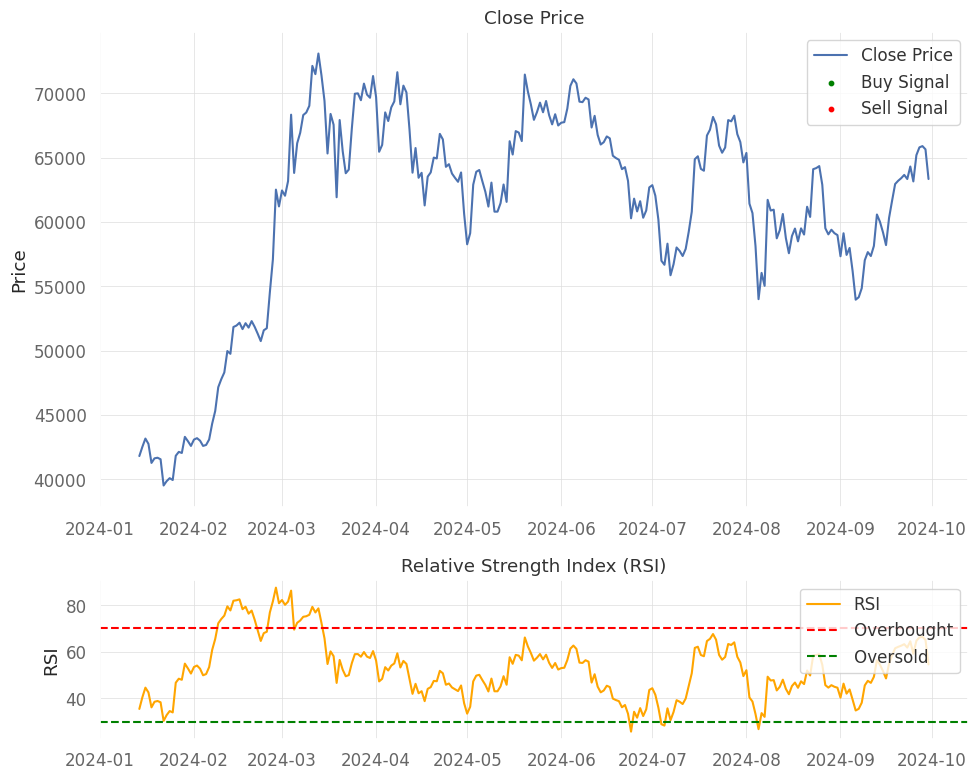

                    Strategy
------------------  ----------
Start Period        2024-01-14
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      0.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              -
Prob. Sharpe Ratio  -
Sortino             -
Sortino/√2          -
Omega               -

Max Drawdown        %
Longest DD Days     -

Gain/Pain Ratio     -
Gain/Pain (1M)      -

Payoff Ratio        -
Profit Factor       -
Common Sense Ratio  -
CPC Index           -
Tail Ratio          -
Outlier Win Ratio   -
Outlier Loss Ratio  -

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Recovery Factor     -
Ulcer Index         0.0
Serenity Index      -
Avg. Drawdown Days  -


/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/quantstats/stats.py:294: RuntimeWarning: invalid value encountered in scalar divide
  res = returns.mean() / divisor
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


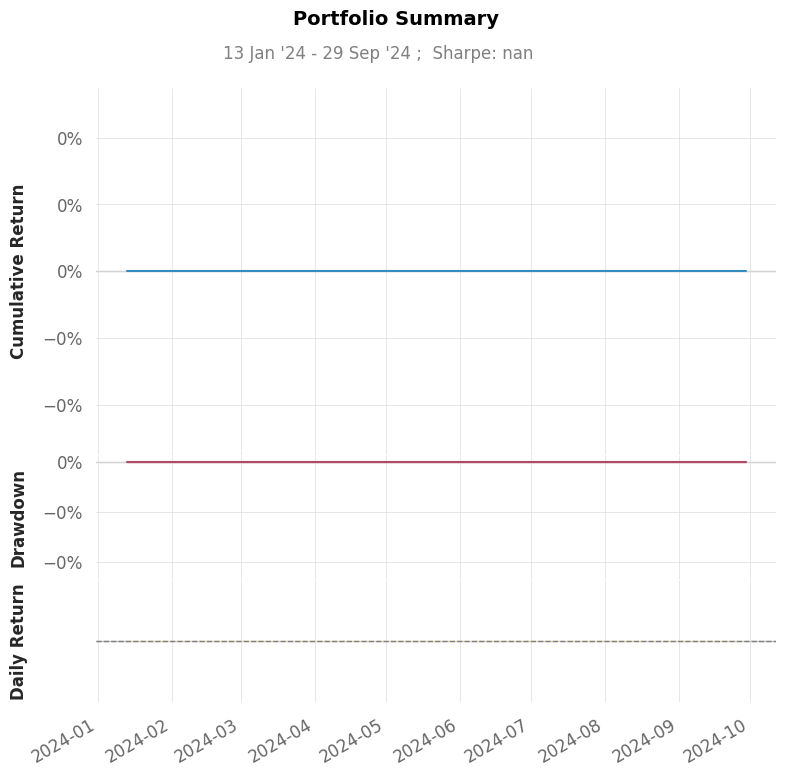

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


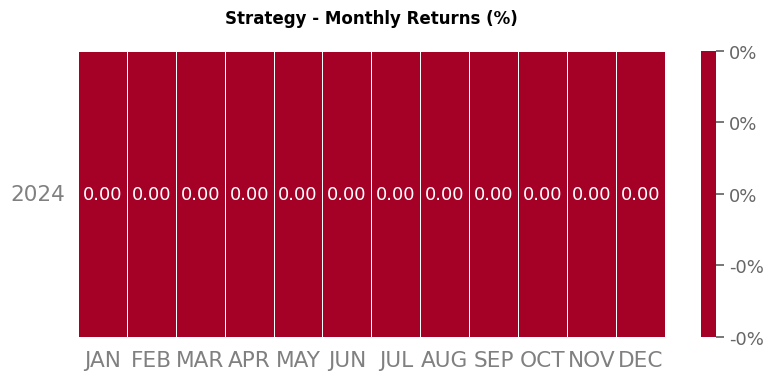

In [6]:
import pandas as pd
import quantstats as qs

test_data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2024-01-01', '2024-10-01', '1d', ['RSI'])

test_env = RsiCustomEnv(test_data, action_space=3, observation_space=6)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    test_env.render()
    done = terminated or truncated
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)